In [55]:
import matplotlib.pyplot as plt 
import cv2
import numpy as np
import os
from tqdm import tqdm

path2images = "Results(01:28)/Testing_Unet_100nm/figures/"
filenames = os.listdir(path2images)
filenames.sort()
impaths = [os.path.join(path2images, im) for im in filenames if ".png" in im]

In [27]:
# Create save directories
pores_dir, ln_dir, fuel_dir, ht9_dir, pt_dir, others_dir = 'Results(01:28)/Testing_Unet_100nm/pores/',\
                                                           'Results(01:28)/Testing_Unet_100nm/ln/',\
                                                           'Results(01:28)/Testing_Unet_100nm/fuel/',\
                                                           'Results(01:28)/Testing_Unet_100nm/ht9/',\
                                                           'Results(01:28)/Testing_Unet_100nm/pt/',\
                                                           'Results(01:28)/Testing_Unet_100nm/others/'  
if not os.path.exists(pores_dir):
    os.makedirs(pores_dir); os.makedirs(ln_dir); os.makedirs(fuel_dir); os.makedirs(ht9_dir)
    os.makedirs(pt_dir); os.makedirs(others_dir)
print("Individual directories created...")   

Individual directories created...


In [72]:
# Required functions
def restrict(img):
    for i in range(len(img[0])):
        if i < 400:
            img[:,i] = 0
    return img

def get_individual_elements(path):
    img = cv2.imread(path,0)
    return img == 0,img == 1,img == 2,img == 3,img == 4,img == 5

def save_images(others, fuel, ln, ht9, pt, pores, fn):
    # Create save directories
    pores_dir, ln_dir, fuel_dir, ht9_dir, pt_dir, others_dir = 'Results(01:28)/Testing_Unet_100nm/pores/',\
                                                            'Results(01:28)/Testing_Unet_100nm/ln/',\
                                                            'Results(01:28)/Testing_Unet_100nm/fuel/',\
                                                            'Results(01:28)/Testing_Unet_100nm/ht9/',\
                                                            'Results(01:28)/Testing_Unet_100nm/pt/',\
                                                            'Results(01:28)/Testing_Unet_100nm/others/' 
    if not os.path.exists(pores_dir):
        os.makedirs(pores_dir); os.makedirs(ln_dir); os.makedirs(fuel_dir); os.makedirs(ht9_dir)
        os.makedirs(pt_dir); os.makedirs(others_dir)
    cv2.imwrite(others_dir+fn, restrict(others)*255); cv2.imwrite(fuel_dir+fn, restrict(fuel)*255); 
    cv2.imwrite(ln_dir+fn, restrict(ln)*255); cv2.imwrite(ht9_dir+fn, ht9*255); 
    cv2.imwrite(pt_dir+fn, pt*255); cv2.imwrite(pores_dir+fn, restrict(pores)*255)

Text(0.5, 1.0, 'pores')

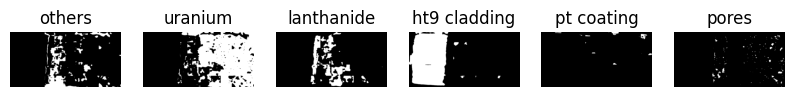

In [73]:
# Display individual elements
img = cv2.imread(impaths[0],0)
others, fuel, ln, ht9, pt, pores = img == 0,img == 1,img == 2,img == 3,img == 4,img == 5
plt.figure(figsize=(10,10))
plt.subplot(661);plt.imshow(restrict(others), cmap="gray"); plt.axis(False);plt.title("others")
plt.subplot(662);plt.imshow(restrict(fuel), cmap="gray"); plt.axis(False);plt.title("uranium")
plt.subplot(663);plt.imshow(restrict(ln), cmap="gray"); plt.axis(False);plt.title("lanthanide")
plt.subplot(664);plt.imshow(ht9, cmap="gray"); plt.axis(False);plt.title("ht9 cladding")
plt.subplot(665);plt.imshow(pt, cmap="gray"); plt.axis(False);plt.title("pt coating")
plt.subplot(666);plt.imshow(restrict(pores), cmap="gray"); plt.axis(False);plt.title("pores")

In [74]:
# save all elements in seperate bins
def main():
    for path in tqdm(impaths): # iterate through every image
        others, fuel, ln, ht9, pt, pores = get_individual_elements(path)
        save_images(others, fuel, ln, ht9, pt, pores, path.split('/')[-1])

main()

100%|██████████| 150/150 [00:03<00:00, 38.78it/s]
